In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from PIL import Image
import site
import numpy as np
import os
import sys
import tarfile
from IPython.display import display
from IPython.display import Image as image2
#from PIL import Image
from scipy import ndimage
from os.path import isfile, join
import h5py
import pandas
from scipy import stats, integrate
import seaborn as sns
import cv2
from six.moves import cPickle as pickle
import tensorflow as tf
%matplotlib inline

checking image existence: ['134.jpg', '261.jpg', '1.jpg', '10.jpg', '100.jpg']


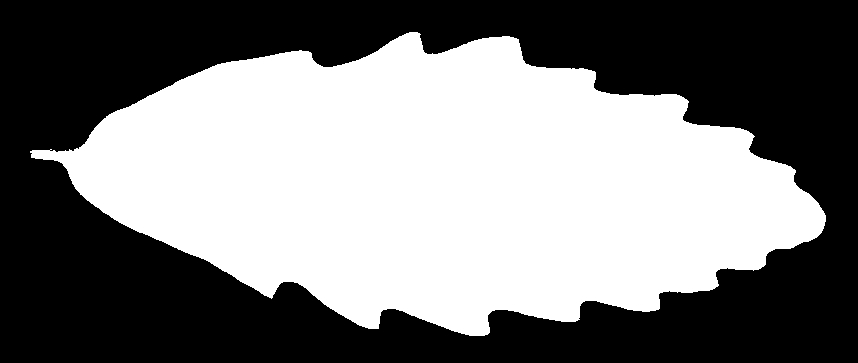

In [17]:
print("checking image existence: %s" % os.listdir('images')[:5])
display(image2(filename="images/10.jpg"))

In [28]:
train_data = pandas.read_csv('train.csv')
test_data = pandas.read_csv('test.csv')
print("we have %s train samples" % np.shape(train_data)[0])
print("and %s test samples" % np.shape(test_data)[0])

we have 990 train samples
and 594 test samples


In [5]:
print(train_data["species"][:5])
print(train_data["id"][:5])

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object
0    1
1    2
2    3
3    5
4    6
Name: id, dtype: int64


We have 99 labels


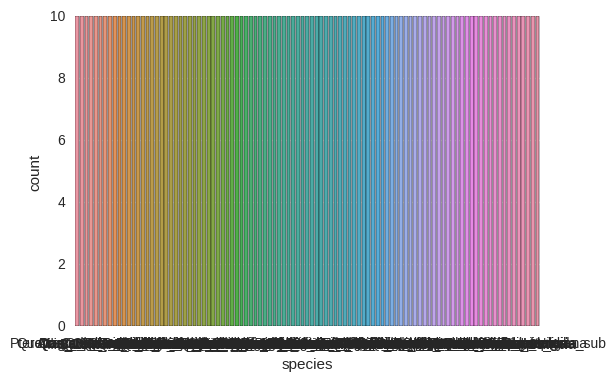

In [6]:
x = train_data["species"]
print("We have %s labels" % train_data["species"].nunique())
import seaborn as sns
sns.countplot(x)


In [7]:
image_names = [f for f in os.listdir('images') if isfile(join('images', f))] 
dim_images = []
print("launch dimension collector")
def get_dimensions(archives):
    for i in archives:
        try:
            with Image.open("images/"+i) as im:
                width, height = im.size
                dim_images.append((width,height))
        except:
            print("exception")

get_dimensions(image_names)

launch dimension collector


In [8]:
len(dim_images)

1584

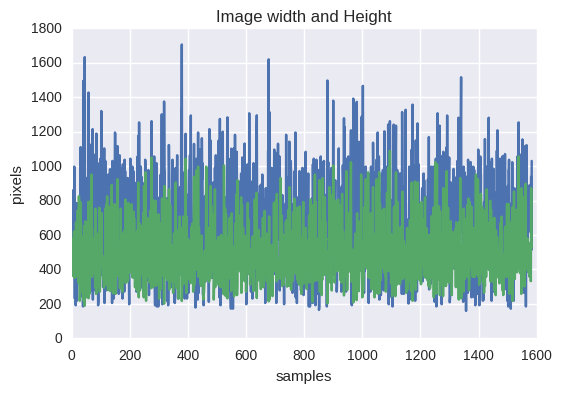

In [9]:
plt.xlabel('samples')
plt.ylabel('pixels')
plt.title('Image width and Height')
plt.plot(dim_images)

In [10]:
files_train = train_data["id"]
print(len(files_train))
def resize_img():
    for i in files_train:
        j = files_train[i]
        try:
            with Image.open("images/"+str(files_train[j])+".jpg") as im:         
                im = im.resize([64,64], Image.ANTIALIAS)
                im.save("imresized/"+str(files_train[j])+".jpg")
        except:
            print("%s caused trouble"% i)
                           
#resize_img()

990


In [50]:
files_train[2]

3

launch dimension collector


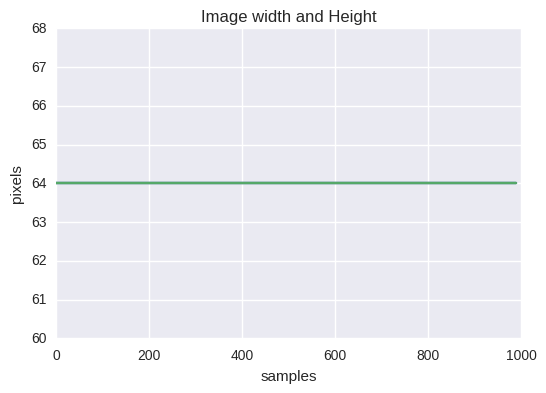

In [11]:
image_names = [f for f in os.listdir('imresized') if isfile(join('imresized', f))] 
dim_images = []
print("launch dimension collector")
def get_dimensions(archives):
    for i in archives:
        try:
            with Image.open("imresized/"+i) as im:
                width, height = im.size
                dim_images.append((width,height))
        except:
            print("exception")

get_dimensions(image_names)
plt.xlabel('samples')
plt.ylabel('pixels')
plt.title('Image width and Height')
plt.plot(dim_images)

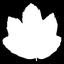

['411.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']


In [93]:
display(image2(filename="imresized/1.jpg"))
folder = "imresized/"
image_files = os.listdir(folder)
print(image_files[0:5])
###this is causing wrong image sequences for our array !!!#

In [111]:
files_train = train_data["id"]
print(files_train[0:5])
def build_filenames():
    new = []
    for i in range(0,len(files_train)):
       
        new.append( str(files_train[i]-1) + ".jpg")

    return new

files_train = build_filenames()
    
print(files_train[0:5])

0    2
1    3
2    4
3    6
4    7
Name: id, dtype: int64
['1.jpg', '2.jpg', '3.jpg', '5.jpg', '6.jpg']


In [137]:

folder = "imresized/"


channels = 1
image_size = 64
pixel_depth = 255.0  # Number of levels per pixel.


def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = files_train
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size,channels),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = cv2.imread(image_file,0)
      image_data = np.expand_dims(image_data, axis = 2)
      image_data = image_data / pixel_depth

      dataset[num_images, :, :,:] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :,:]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
own_dataset = load_letter(folder,5)



imresized/
Full dataset tensor: (990, 64, 64, 1)
Mean: 0.462755
Standard deviation: 0.484573


In [138]:
train_labels = train_data["species"]

In [139]:
pickle_file = 'leafs.pickle'

dataset={
    'train_dataset': train_dataset,
     'train_labels': train_labels,
   # 'test_dataset': test_dataset,
}

with open(pickle_file, 'wb') as picklefile:
    pickle.dump(dataset, picklefile, pickle.HIGHEST_PROTOCOL)
picklefile.close()

In [140]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 16224638


In [5]:
pickle_file = 'leafs.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  del save 



<H1>Transforming text labels to numerical values</H1>

990
label is [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


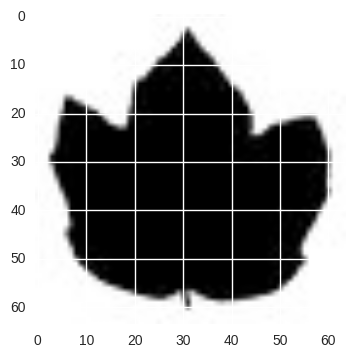

In [21]:
print(len(train_labels))
print("label is %s" % train_labels[180])
img=train_dataset[180,:,:,0]
plt.imshow(img)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [192]:
le = preprocessing.LabelEncoder()
le.fit(train_labels)
LabelEncoder()
list(le.classes_)
#bob = list(le.classes_)
transf_labels = le.transform(train_labels) 

In [194]:
#print(train_dataset.shape)
print(train_labels.shape)
print(train_labels[180])
print(transf_labels[180])
print(len(transf_labels))


(990,)
Acer_Opalus
3
990


99

In [13]:
def onehot_labels():
    newarray = []
    for i in range(len(transf_labels)):
        labelrack = []
        labelrack = np.zeros(100)
        hotno = transf_labels[i]
        labelrack[hotno] = 1.0
        newarray.append(labelrack)

    return newarray
        
newarray = onehot_labels()


In [146]:
def convert_to_one_hot(species):
    names = (sorted(list(set(species))))
    labels = np.zeros((len(species),len(names)))
    for j, i in enumerate(species):
        labels[j, names.index(i)] = 1
    return (labels)

labels = convert_to_one_hot(transf_labels)

In [128]:

print(newarray[180])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [31]:
image_size = 64
num_channels = 1
####for my non convoluted network attempt the formatting will go ahead with two keys for x and y parameters each

def reshape(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    #setting this as float will cause problems
    #labels = transf_labels.astype(np.int32)
    labels = np.array(newarray).astype(np.float32)
    return dataset, labels

train_dataset, train_labels = reshape(train_dataset, train_labels)
print('Training set', train_dataset.shape, train_labels.shape)


Training set (990, 4096) (990, 100)


In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import *
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [16]:
batch_size = 50
nb_classes = 100
nb_epoch = 10
img_rows, img_cols = 64,64
input_shape = (img_rows, img_cols, 1)
# number of convolutional filters to use
nb_filters = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [150]:
model = Sequential()
model.add(Dense(1024, input_shape=(4096,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_7 (Dense)                  (None, 1024)          4195328     dense_input_3[0][0]              
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 1024)          0           dense_7[0][0]                    
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 1024)          0           activation_7[0][0]               
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 1024)          1049600     dropout_5[0][0]                  
___________________________________________________________________________________________

In [17]:

#Y_train = np_utils.to_categorical(y_train, nb_classes)


datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_dataset)

In [18]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 62, 62, 64)    640         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 62, 62, 64)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 60, 60, 64)    36928       activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 60, 60, 64)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [20]:
model.fit_generator(datagen.flow(train_dataset, train_labels, batch_size=32),
                    samples_per_epoch=len(train_dataset), nb_epoch=nb_epoch)
score = model.evaluate(train_dataset,train_labels, verbose=0)
model.save_weights('leafcnn.h5')
print('Test score:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
990/990 [==============================] - 137s - loss: 15.6164 - acc: 0.0081         

In [154]:
history = model.fit(train_dataset,train_labels,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(train_dataset,train_labels))
score = model.evaluate(train_dataset,train_labels, verbose=0)
model.save_weights('leafcnn.h5')
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 990 samples, validate on 990 samples
Epoch 1/1000
990/990 [==============================] - 9s - loss: 15.9553 - acc: 0.0101 - val_loss: 15.9553 - val_acc: 0.0101

KeyboardInterrupt: 

In [195]:
train_labels = train_data["species"]

le = preprocessing.LabelEncoder()
le.fit(train_labels)
LabelEncoder()
list(le.classes_)
target_names = list(le.classes_)



In [196]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

In [197]:

h, w = 64, 64

X_train, X_test, y_train, y_test = train_test_split(
    train_dataset, train_labels, test_size=0.2, random_state=7)
n_components = 200

In [198]:
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 200 eigenfaces from 792 faces
done in 5.943s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.710s


In [199]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 58.300s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [200]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(99)))

Predicting people's names on the test set
done in 0.348s
                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      0.50      0.67         2
             Acer_Circinatum       1.00      0.40      0.57         5
                   Acer_Mono       0.25      1.00      0.40         1
                 Acer_Opalus       1.00      1.00      1.00         2
               Acer_Palmatum       1.00      1.00      1.00         2
                 Acer_Pictum       0.00      0.00      0.00         3
             Acer_Platanoids       0.50      1.00      0.67         2
                 Acer_Rubrum       1.00      1.00      1.00         1
              Acer_Rufinerve       0.00      0.00      0.00         1
            Acer_Saccharinum       0.67      0.67      0.67         3
               Alnus_Cordata       1.00      1.00      1.00         2
          Alnus_Maximowiczii       1.00      0.60      0.75         5
                 Alnus_Rubra    

In [201]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [243]:
y_test = np.asarray(y_test)

def title():
    
    pred_titles = []
    for i in range(1,len(y_pred)):
        pred_index = target_names.index(y_pred[i])
        true_index = target_names.index(y_test[i])
        pred_name = target_names[pred_index]
        true_name = target_names[true_index]
        pred_titles.append('pred: %s\ntrue:      %s' % (pred_name[:10], true_name[:10]))
        
    return pred_titles

results = title()

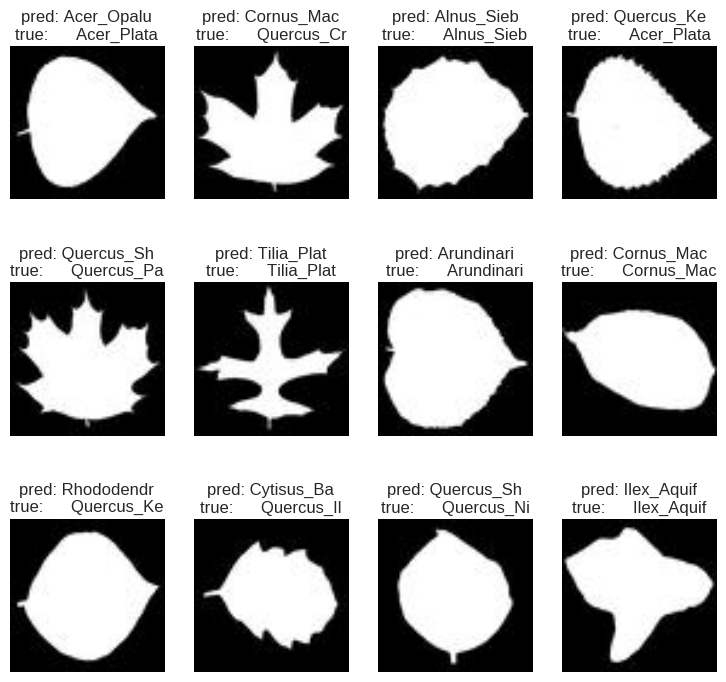

In [245]:
plot_gallery(X_test, results, h, w)

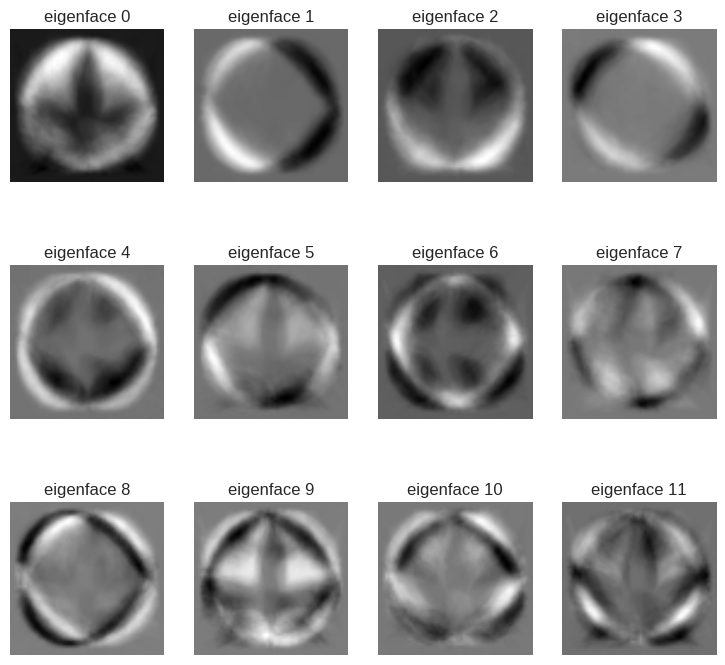

In [241]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()